# Stock Price Analysis With Python

# Importing Libraries Required

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,20)

# Import Dataset and Data Cleansing
### Reading the data provided, setting the dates as index as this will be a time series study and selecting the data for the years 2017-2020 and saving the dataframe

In [2]:
datasetx = pd.read_csv('dataset.csv', index_col='Date', parse_dates=True)
dataset = datasetx["2017-01-02":"2020-12-31"]

### Storing required banks' stocks data in separete dataframes

In [3]:
icici_dataset=dataset[dataset["Symbol"]=="ICICIBANK"]
axis_dataset=dataset[dataset["Symbol"]=="AXISBANK"]
hdfc_dataset=dataset[dataset["Symbol"]=="HDFCBANK"]

# Hypothesis to Explore
### How can we analyse the behaviour of the stocks for the 3 provided banks for the year 2017-2020 so that the investors can pick stocks from industry for low-risk low gain or high-risk high gain depending on their risk appetite by comparing stock prices or stock volumes

# Insights

## Comparing the stock prices of the three banks for the years 2017-2020 :

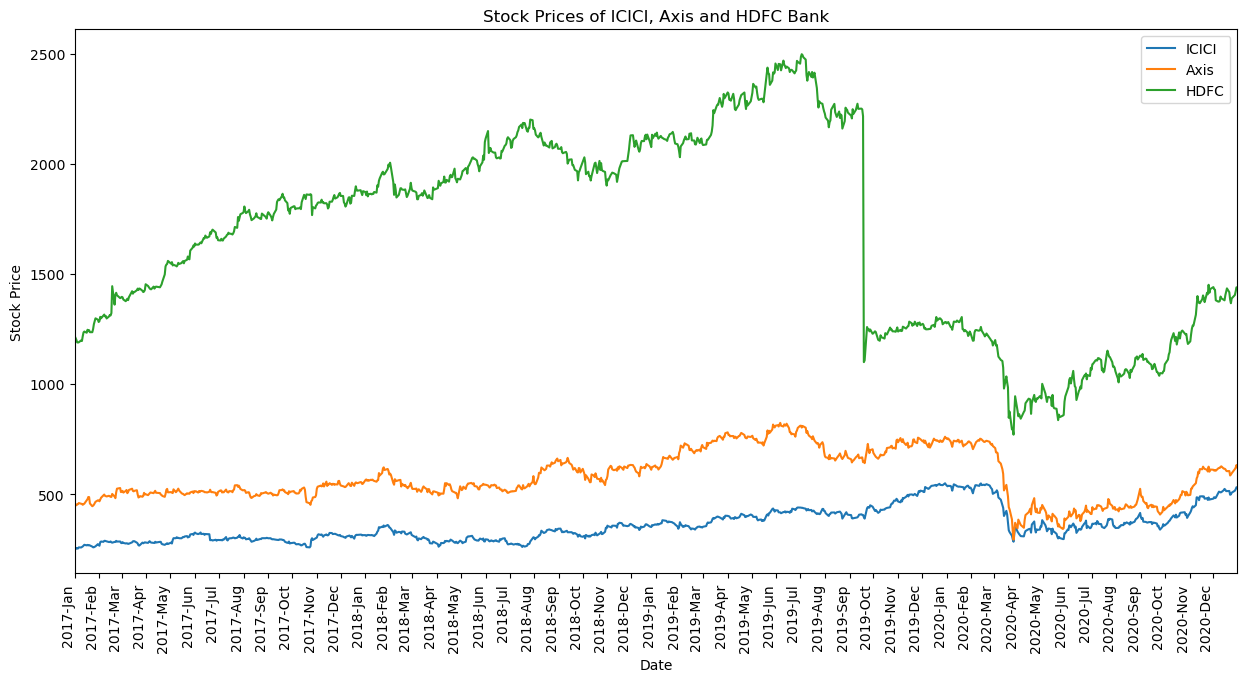

In [4]:
icici_dataset['Open'].plot(label = "ICICI", figsize = (15,8))
axis_dataset['Open'].plot(label = "Axis")
hdfc_dataset['Open'].plot(label = "HDFC")
plt.title("Stock Prices of ICICI, Axis and HDFC Bank")
plt.legend()
dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.xlim([datetime.date(2017, 1, 1), datetime.date(2020, 12, 31)])
plt.ylabel("Stock Price")
plt.show()


## HDFC Bank stocks are significantly costlier than Axis Bank and ICICI Bank stocks being the least costly

## Calculating the percentage increase in the stock value and comparing its distribution for the three banks :

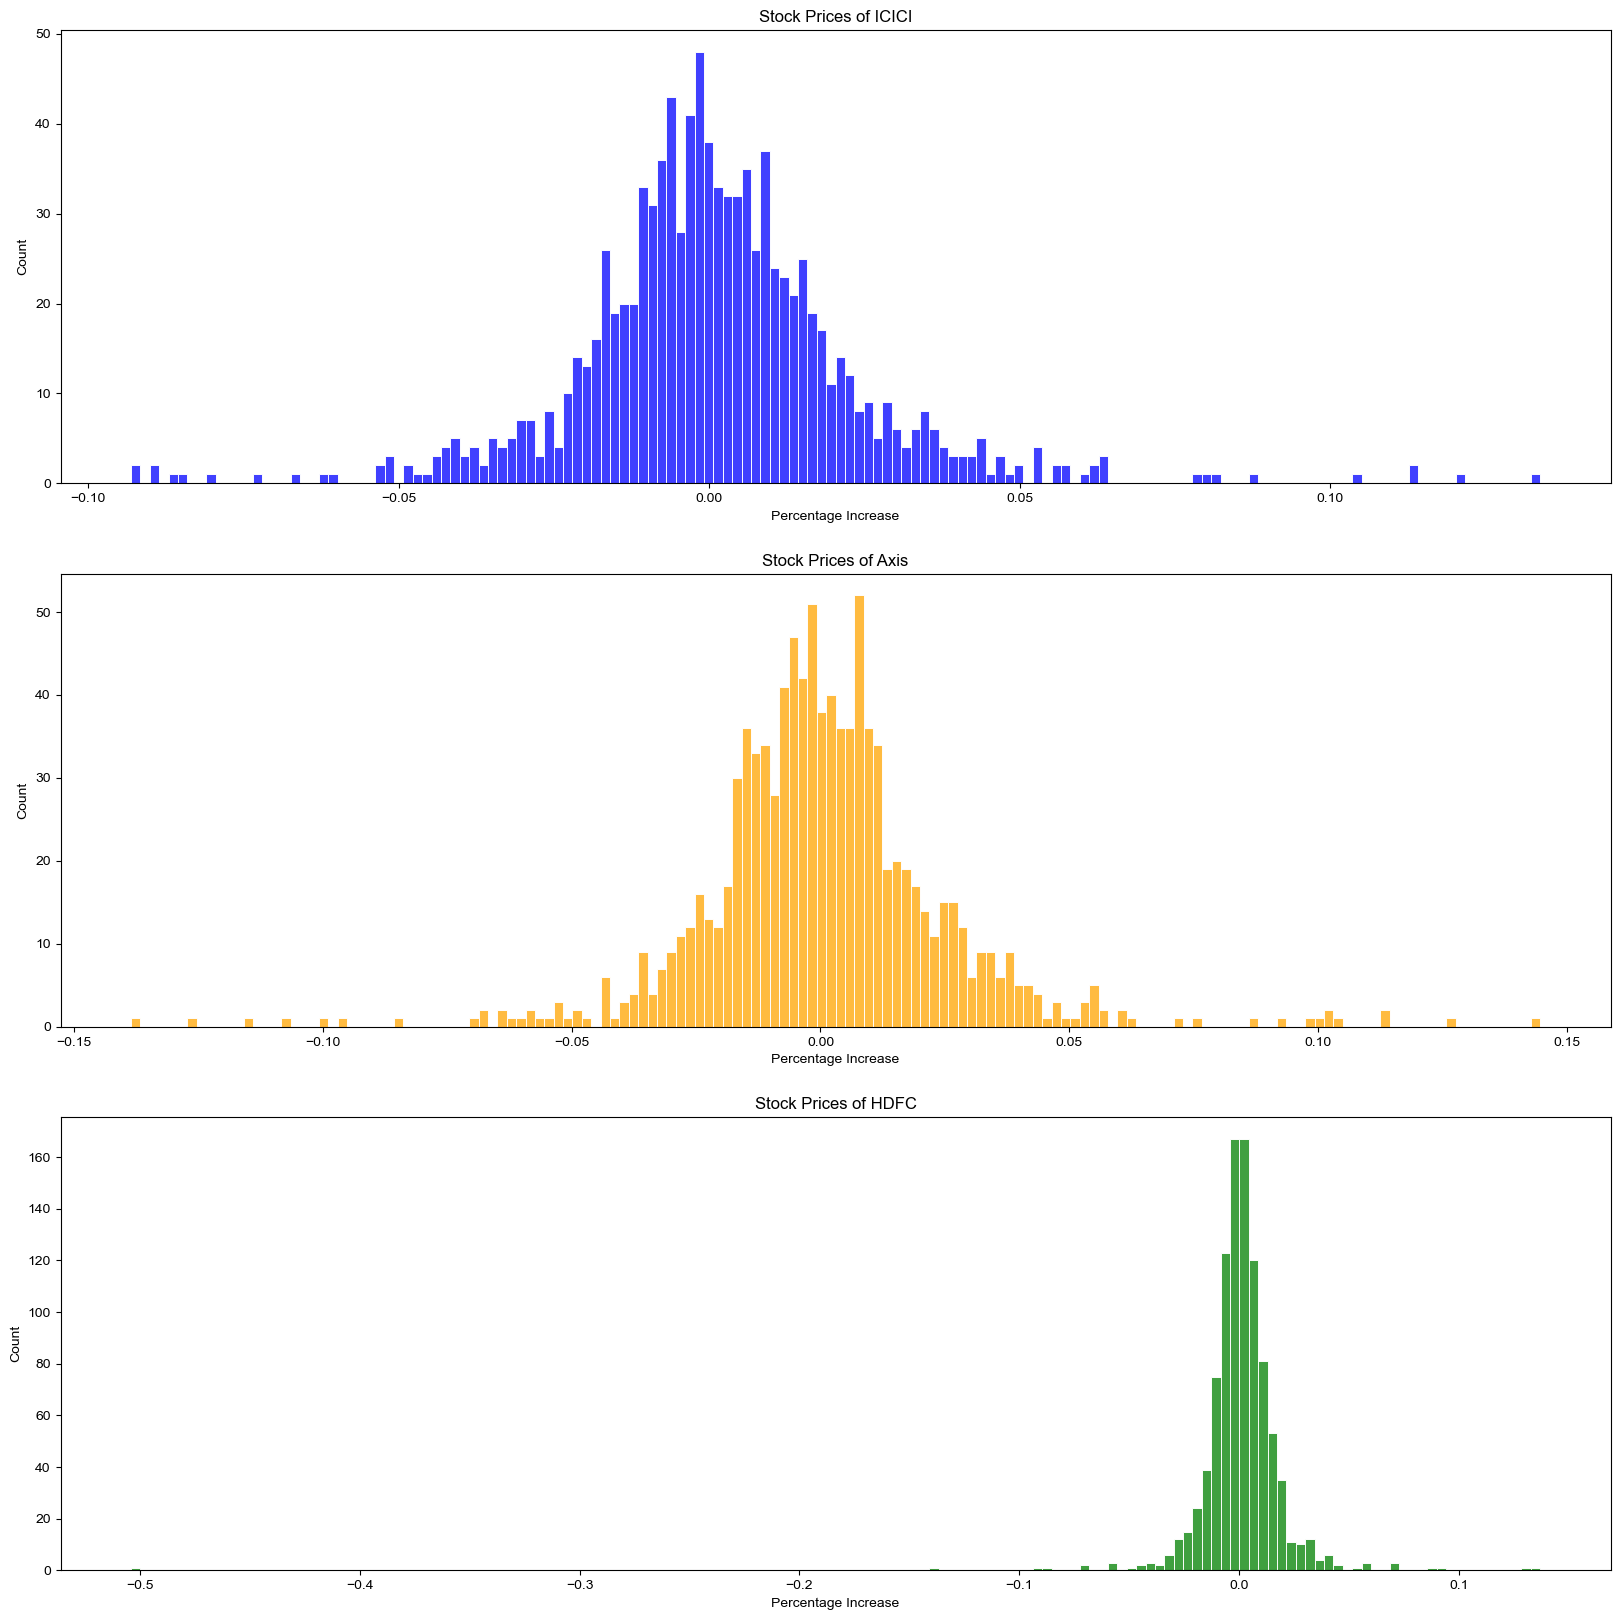

In [5]:
pd.set_option('mode.chained_assignment',None)
icici_dataset["Pct_Change"] = icici_dataset.loc[:,("Open")].pct_change()
axis_dataset["Pct_Change"] = axis_dataset.loc[:,("Open")].pct_change()
hdfc_dataset["Pct_Change"] = hdfc_dataset.loc[:,("Open")].pct_change()
fig, axes = plt.subplots(3)
sns.set(rc={"figure.figsize":(20, 20)})
sns.histplot(icici_dataset["Pct_Change"].dropna(),bins=150,kde=False,color='blue',label="ICICI",ax=axes[0]).set(xlabel="Percentage Increase", ylabel="Count",title="Stock Prices of ICICI")
sns.histplot(axis_dataset["Pct_Change"].dropna(),bins=150,kde=False,color='orange',label="Axis",ax=axes[1]).set(xlabel="Percentage Increase", ylabel="Count",title="Stock Prices of Axis")
sns.histplot(hdfc_dataset["Pct_Change"].dropna(),bins=150,kde=False,color='green',label="HDFC",ax=axes[2]).set(xlabel="Percentage Increase", ylabel="Count",title="Stock Prices of HDFC")
plt.show()

## <font color=red>It is clear from the graph that the percentage increase in stock price histogram for HDFC is the widest which indicates the stock of HDFC is the most volatile among the three companies compared, ICICI stocks being the least volatile</font>

## Comparing the total stocks traded for the three banks for the years 2017-2020 :

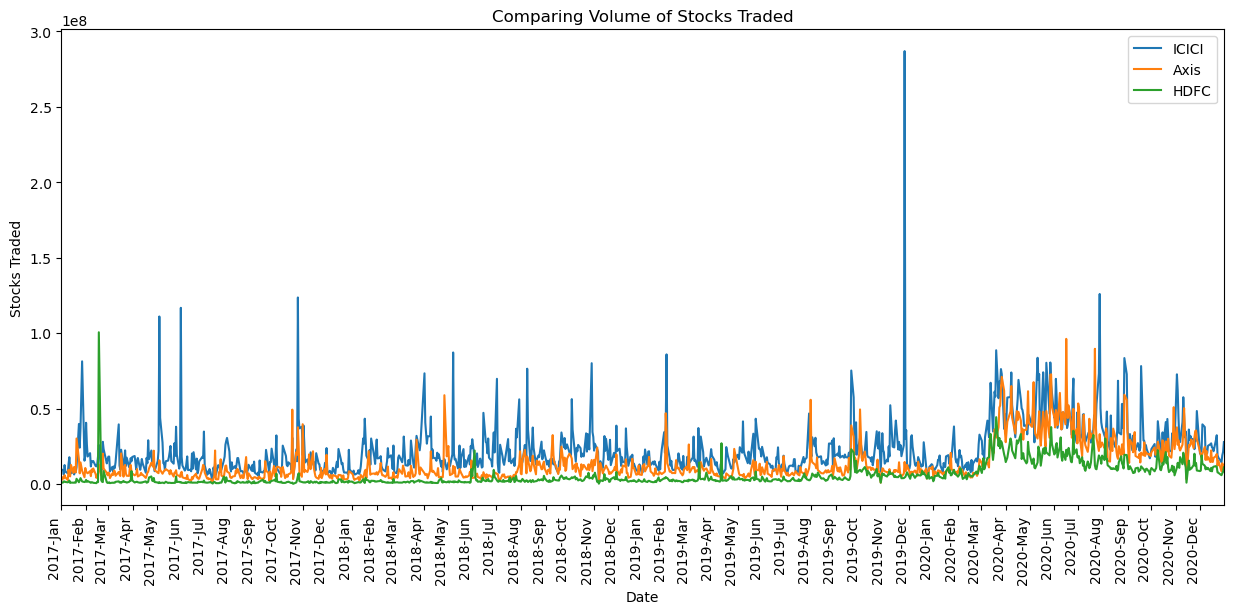

In [5]:
icici_dataset['Volume'].plot(label = "ICICI", figsize = (15,7))
axis_dataset['Volume'].plot(label = "Axis")
hdfc_dataset['Volume'].plot(label = "HDFC")
plt.title("Comparing Volume of Stocks Traded")
plt.legend()
dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.xlim([datetime.date(2017, 1, 1), datetime.date(2020, 12, 31)])
plt.ylabel("Stocks Traded")
plt.show()


### The above graph gives us an idea that ICICI bank has had the most stocks traded for this time period. Calculating the actual worth of these stocks would be a better approach

## We can use the stock prices and the volume of the stocks to calculate Market Capital for each  bank and study for the years 2017-2020

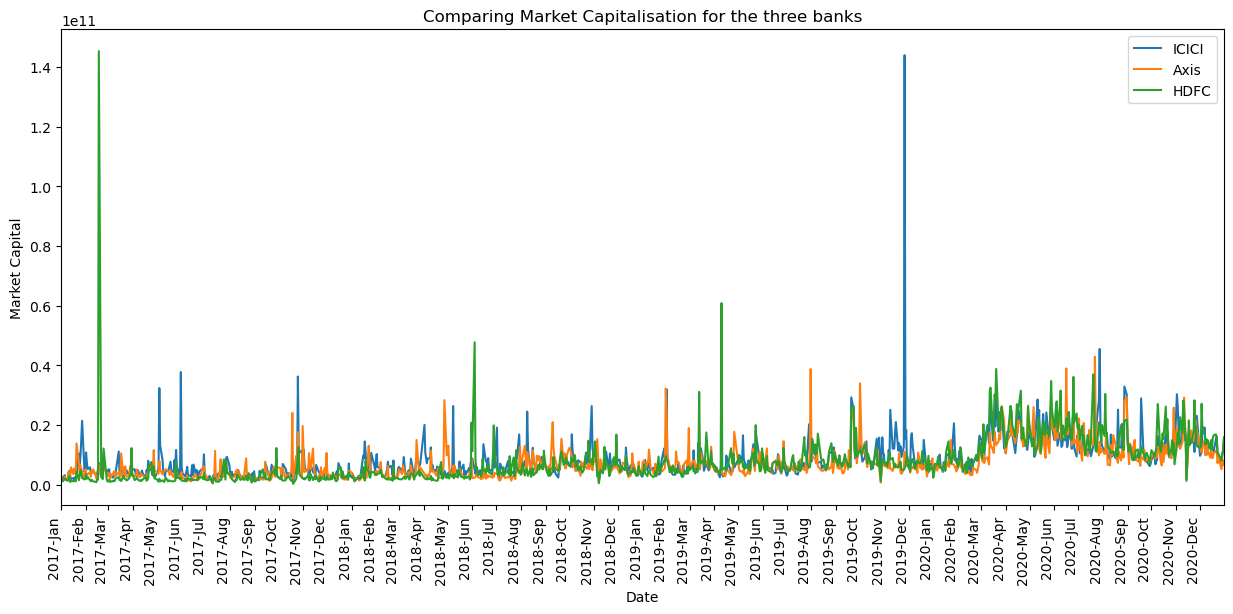

In [6]:
pd.set_option('mode.chained_assignment',None)
icici_dataset['MarktCap'] = icici_dataset['Open'] * icici_dataset['Volume']
axis_dataset['MarktCap'] = axis_dataset['Open'] * axis_dataset['Volume']
hdfc_dataset['MarktCap'] = hdfc_dataset['Open'] * hdfc_dataset['Volume']
icici_dataset['MarktCap'].plot(label = 'ICICI', figsize = (15,7))
axis_dataset['MarktCap'].plot(label = 'Axis')
hdfc_dataset['MarktCap'].plot(label = 'HDFC')
plt.title('Comparing Market Capitalisation for the three banks')
plt.legend()
dtFmt = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.xlim([datetime.date(2017, 1, 1), datetime.date(2020, 12, 31)])
plt.ylabel("Market Capital")
plt.show()

### The above graph shows the market capital for each of the banks for the timeline we are studying. Looking at the graph, its hard to provide any insights. To observe any trend or pattern we can take the help of a 50-day 200-day average

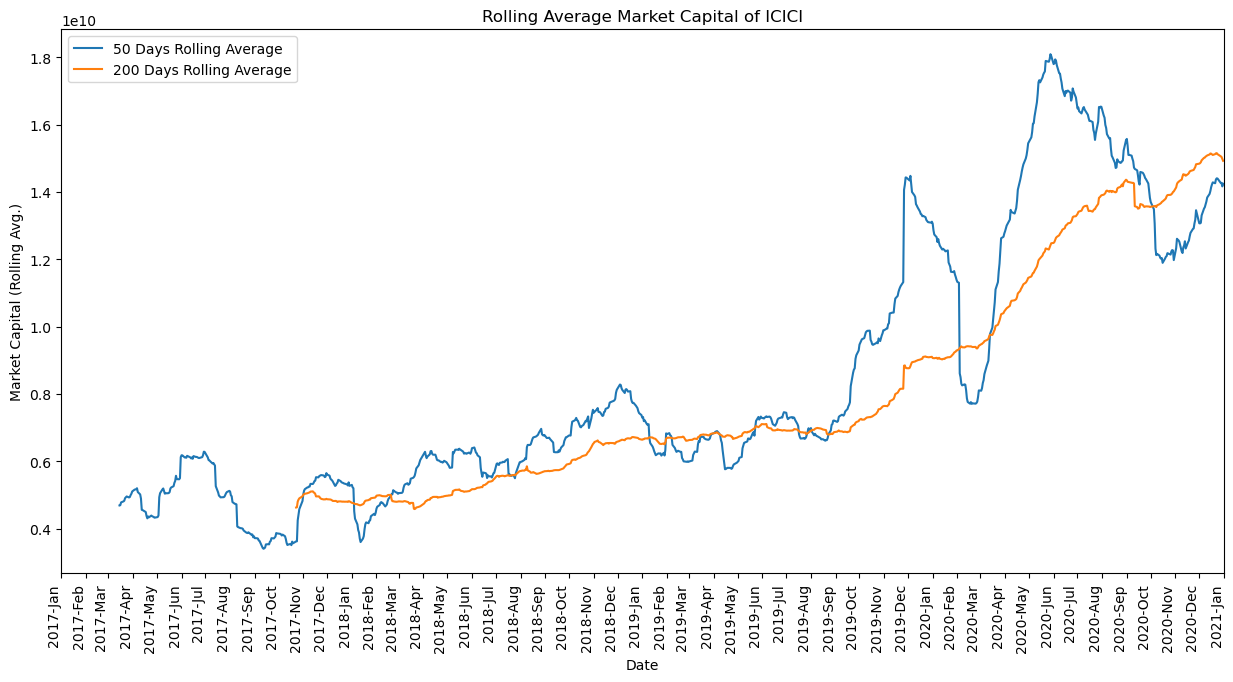

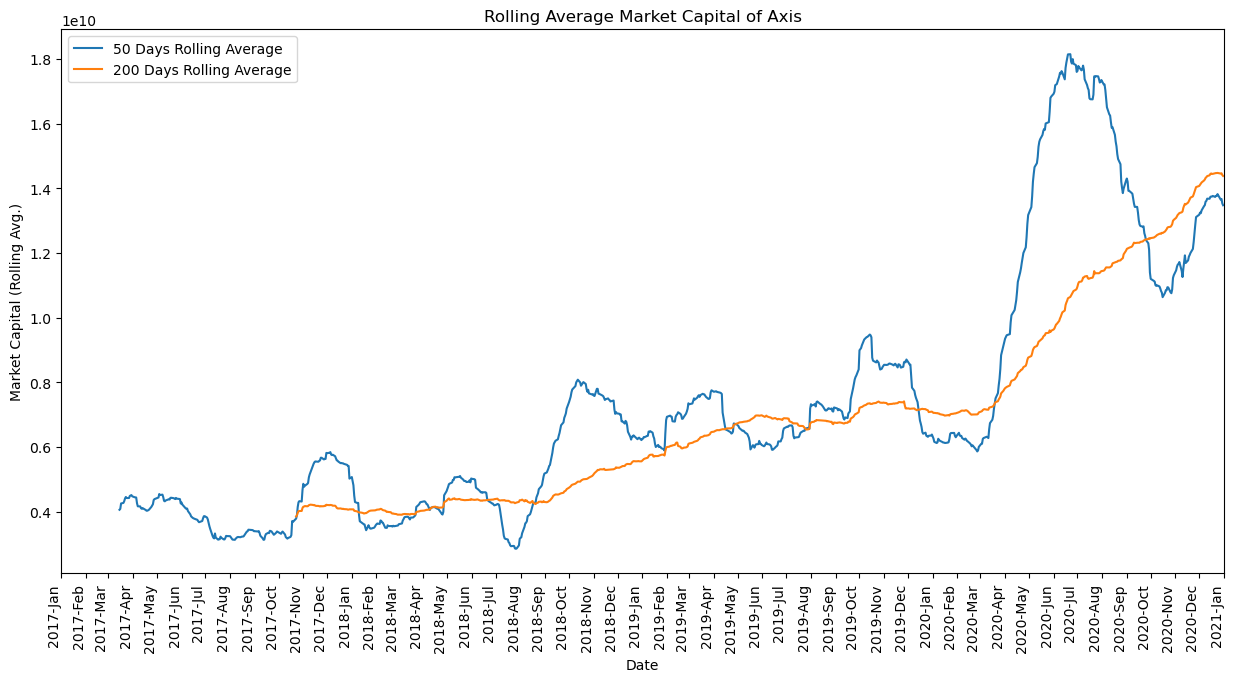

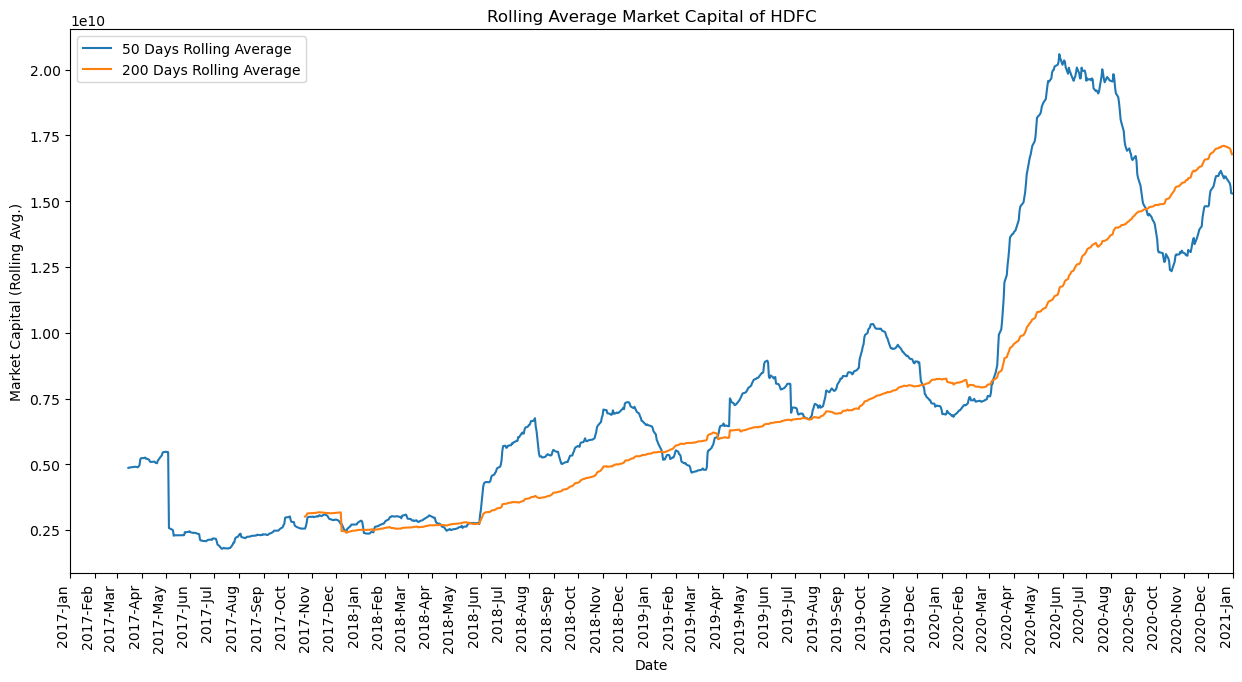

In [7]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def rolling_dataset(bdata):
 pd.set_option('mode.chained_assignment',None)   
 bdata['MA50'] = bdata['MarktCap'].rolling(50).mean()
 bdata['MA200'] = bdata['MarktCap'].rolling(200).mean()
 
 bdata['MA50'].plot(figsize = (15,8), label='50 Days Rolling Average')
 bdata['MA200'].plot(label='200 Days Rolling Average')
 if get_df_name(bdata) == "icici_dataset" :
    plt.title("Rolling Average Market Capital of ICICI")
 elif get_df_name(bdata) == "axis_dataset":
    plt.title("Rolling Average Market Capital of Axis")
 else :
    plt.title("Rolling Average Market Capital of HDFC")
 plt.legend()
 dtFmt = mdates.DateFormatter('%Y-%b')
 plt.gca().xaxis.set_major_formatter(dtFmt)
 plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
 plt.xticks(rotation=90)
 plt.xlim([datetime.date(2017, 1, 1), datetime.date(2021, 1, 1)])
 plt.ylabel("Market Capital (Rolling Avg.)")   
 plt.show()
    
rolling_dataset(icici_dataset)
rolling_dataset(axis_dataset)
rolling_dataset(hdfc_dataset)

## <font color=red>Difference between the lowest and the highest 50 day and 200 day average Market Capital for HDFC is the most making its stocks viable for high risk-high gain whereas the difference is the least for ICICI making its stocks viable for  low-risk low gain</font>

# Thank You
# Capstone Project by : Nikhlesh